
![gog](https://sakizo-blog.com/wp-content/uploads/2021/11/st_alt2-1.png)

____
# ICA 4: Visualization Technicalities

For this ICA, you will turn in your own notebook. You can work together as always, but I want each of you to try these steps on your own for a dataset of your choosing. 

In today's ICA we will explore the grammar of graphics (GoG), which is a less well-known, but increasingly popular, paradigm for producing visualizations.

We'll work with Altair today. But, there are many other GoG libraries out there and you should explore them! If I had to suggest perhaps the most obvious library to learn after ([before?](https://www.youtube.com/watch?v=jNiQaErXg8s)) Altair, it would be Plotly; as you have seen in some of the assignments, it is very powerful. Examine both for your projects.

Anyway, let's get to it!

We are going to walk through the steps of building a visualization **very slowly** - what might seem like ridiculously slow. But, the idea is that you appreciate how the "grammar" works.

Your first step is to rearrange the tables you are sitting at so that your group members can all look at one screen together. In the first part of this ICA you will:
* read what I wrote below and follow along (for the mpg dataset); you can have this shown on one of your group's laptops show on one of your monitors,
* mimic each step with a second laptop on the other monitor (e.g., the iris or penguin dataset - you pick!).

I want to be sure you know how to perform these steps for your own dataset.



_______


I'll use for today the "mpg" dataset and bring it in through `vega_datasets`, another place to get nice datasets. You get another dataset of your group's choosing. Consider also using `vega_datasets` so that you get familiar with it. 

Note: there may be some issues with this ICA: be prepared to install libraries you might not have and try different notebook environments. I last edited this in VS Code and struggled a bit. (Works now!)

In [1]:
!pip install vega_datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install --upgrade altair vega_datasets jupyterlab

  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
Using cached altair-5.4.1-py3-none-any.whl (658 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.9/166.9 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 5.0.1
    Uninstalling altair-5.0.1:
      Successfully uninstalled altair-5.0.1
  Attempting uninstall: jupyterlab-server
    Found existing installation: jupyterlab_server 2.25.1
    Uninstalling jupyterlab_server-2.25.1:
      Successfully uninstalled jupyterlab_server-2.25.1
  Attempting uninstall: jupyterlab
    Found existing installation: jupyterlab 4.0.11
    Uninstalling jupyterlab-4.0.11:
      Successfully uninstalled jupyterlab-4.0.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

Let's get the cars dataset. And, you get yours to compare with these steps.

In [5]:
import altair as alt
from vega_datasets import data
cars = data.cars()

We are going to start with [`.Chart`](https://altair-viz.github.io/getting_started/starting.html#the-chart-object), although Altair has [other options](https://altair-viz.github.io/user_guide/API.html#top-level-objects). The way you get started is to call Altair through `alt` (or whatever you chose to call it in the `import` statement above), create a chart and pass the dataframe. Note that the dataframe is the natural container for Altair (as opposed to lists, dictionaries or arrays), just as it was for Seaborn. Basically, this means Altair keeps track of the columns names and can use them.  

Run this piece of code, **which will generate an error**. Don't panic! 

In [8]:
alt.Chart(cars)

SchemaValidationError: '{'data': {'name': 'data-583e73726c1545c56c203344161a975c'}}' is an invalid value.

'mark' is a required property

alt.Chart(...)

What Altair is complaining about is that it is not possible to map the data onto a visual without knowing a minimal level of mapping. We need to use at least one more dot in the dot chain! Let's a `.mark_point` to map numbers to symbols.

Next, run this cell:


In [10]:
alt.Chart(cars).mark_point()

alt.Chart(...)

What do you see? This might not look like much - a circle in a square. Seems weird, right?

This result is expected in the GoG way of doing things: we have mapped the data onto a marker, _but have not given any more information_ about how it should be organized. Thus, we get a "0D" plot! Next time you need a 0D plot, you know how to make one!

Notice that in the GoG, nothing is taken for granted, very little is assumed for you. Think of this as starting with letters, then we can build words, then we can put words together, and so on.....

The next "dot" that we need is an encoding (`.encode()`) that maps the markers to some geometry; that is, to an axis (or more). Let's do a simple encoding next:


In [14]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower'
)


alt.Chart(...)

Gorgeous! Since we only encoded one variable to the $x$ axis, we get a 1D plot. I bet you have not seen many 0D and 1D plots before - welcome to GoG!


Interestingly, this is basically a "rug plot", which we saw in Seaborn and you made in the HW. In Altair's GoG, a rug plot is a very natural type of plot.

Do this with your dataset; compare the two monitors.

Make an "official" rug plot, try `mark_tick()`.

  But, let's keep going! Let's add an encoding to the $y$ axis.

In [17]:
base_chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

base_chart

alt.Chart(...)

At this point, we have a normal 2D scatter plot. Relative to `matplotlib`, the syntax looks maybe unusual; but, there is a nice logic to it.

Let's make two jumps now, adding a color and also getting some of the true power of Altair by making the plot interactive. Again, do this with your second dataset as well. Here's how you do that:

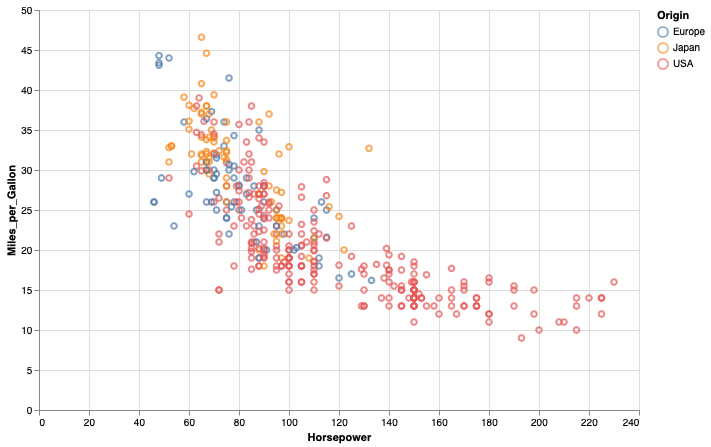

In [20]:
# you may need this in VSCode 
alt.renderers.enable('mimetype')

cars = data.cars()

chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
).properties(
    width=600,
    height=400
).interactive()

chart

What interactions can you do? Can you pan? Zoom? Save a PNG? If you double click, it returns you to the default settings. Make sure all of this works for both datasets.

What if we want to do EDA on this dataset and put a categorical variable on the $x$ axis?

Simple:

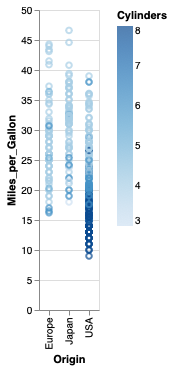

In [22]:
alt.Chart(cars).mark_point().encode(
    x='Origin',
    y='Miles_per_Gallon',
    color='Cylinders',
).interactive()

Try this with the categorical variables in the second dataset as well.

What about the $y$ axis?

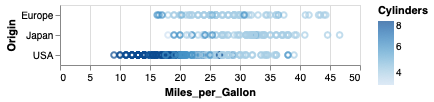

In [25]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders',
).interactive()

As you can see, it is very easy to make logical changes to the layout.

Notice how the `color` option works for real values (this case) and discrete categories (the case above with `color='Origin'`).

What does this next code do? That is, what is the ":O"? [hint](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

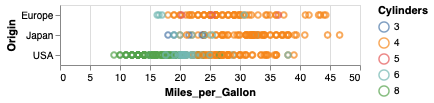

In [30]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:N',
).interactive()

What happens if you change the ":O" to ":N"?

Again, compare and constrast the two datasets on the two monitors.

Ok, you get the idea: GoG is very nice for EDA!

There is a lot more to GoG, but we want to keep this fairly short.

____

But, now it is your turn. To complete this ICA you will need to use the [Altair docs](https://altair-viz.github.io/index.html).


Take your dataset and vary these options:
* change `mark_point` to several of the [other options](https://altair-viz.github.io/user_guide/marks.html) (e.g., bar),
* how do you change colors?
* vary the [encodings](https://altair-viz.github.io/user_guide/encoding.html),
* how do you export a PNG or PDF?
* for DS, tooltips are extremely useful - [make a plot with tooltips](https://altair-viz.github.io/gallery/scatter_tooltips.html)
* make a plot that uses [facets](https://altair-viz.github.io/user_guide/compound_charts.html),
* look through the gallery and attempt some of the styles, such as area charts, circular plots, and so on,
* discuss with your group members what their plans are for visualizations in their projects - list ideas from your discussion in a markdown cell of how Altair plots might be used among your group members. (Or, are your group members planning to not use Altair at all?)

If you like Altair and want to use it for your project, take a look at [this example](https://altair-viz.github.io/case_studies/exploring-weather.html). If you want an East Lansing weather dataset, let me know.

In [36]:
import altair as alt
from vega_datasets import data

# List all available datasets
datasets = data.list_datasets()


In [46]:
## Solution: using the population dataset
population = data.population()
alt.Chart(population).mark_bar()

In [48]:
population

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


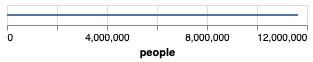

In [54]:
alt.Chart(population).mark_line().encode(
    x='people'
)


### Changing encodings

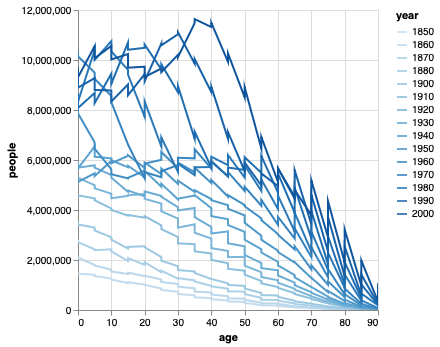

In [94]:
alt.Chart(population).mark_line().encode(
    x='age',
    y='people',
    color='year:O'
).interactive()


### changing color

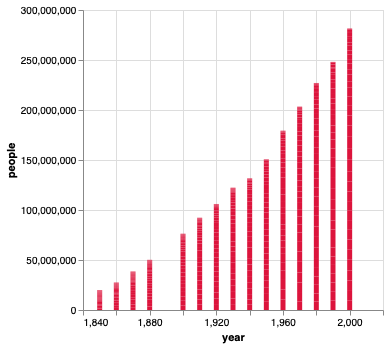

In [96]:
alt.Chart(population).mark_bar().encode(
    x='year',
    y='people',
    color=alt.value("crimson")
).interactive()

### include tooltips

In [120]:
chart=alt.Chart(population).mark_point().encode(
    x='age',
    y='people',
    color='year:O',
    tooltip=['sex', 'people', 'year', 'people']
).interactive()


### saving the image as png

In [122]:
## to save the image as png
!pip install vl-convert-python

chart.save("interactiveplot.png")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 16.4 MB/s eta 0:00:0000:0100:01


### Facets

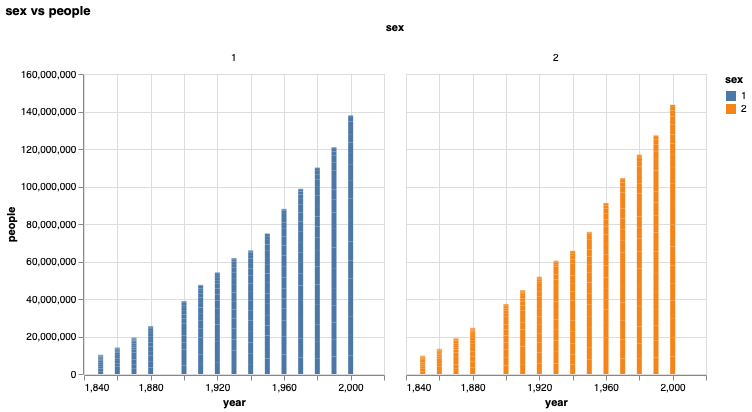

In [116]:
alt.Chart(population).mark_bar().encode(
    x='year',
    y='people',
    color='sex:N'  # Color points by Origin
).facet(
    column='sex'  # Create a separate plot for each Origin
).properties(
    title="sex vs people "
).interactive()


### An arc plot

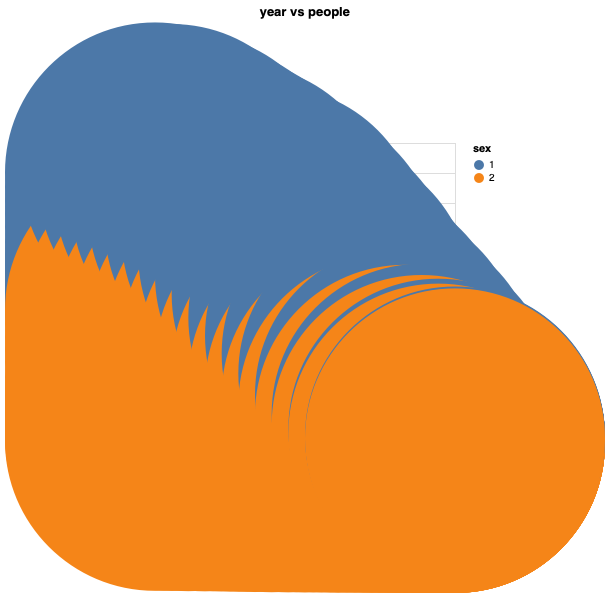

In [135]:

# Create an area chart to show the number of rainy days per month
area_chart = alt.Chart(population).mark_arc().encode(
    x='age:T',
    y='people:Q',
    color='sex:N'
).properties(
    title="year vs people"
)

area_chart


The team members are strongly considering to use the library. Out of which 3 of them are using plotly as well for building the project. They are interested in the interactive plots and will make it more detailed. Plotly was more preferable for making plot of 3 dimentions. 